**I Wayan Rangga Rijasa - 0706022210019**

# **Week 7**


---


## Random Forest and Gradient Boosting Classifier
Today lab exercise will be using Bank Marketing Dataset
- Download the **Bank Marketing Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
Age <br>
Job : type of job <br>
Marital : marital status <br>
Education <br>
Default: has credit in default? <br>
Housing: has housing loan? <br>
Loan: has personal loan? <br>
Contact: contact communication type <br>
Month: last contact month of year <br>
Day: last contact day of the week <br>
Duration: last contact duration, in seconds. Important
note: this attribute highly affects the output target (e.g., if
duration=0 then y='no'). <br>
Campaign: number of contacts performed during this campaign and for
this client (includes last contact) <br>
Pdays: number of days that passed by after the client was last
contacted from a previous campaign (999 means client was not
previously contacted) <br>
Previous: number of contacts performed before this campaign and for
this client <br>
Poutcome: outcome of the previous marketing campaign <br>
y: has the client subscribed a term deposit?

## Import Libraries

In [2]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Load Dataset

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/RanggaRijasa/DataMining2024/refs/heads/main/Bank.csv', delimiter=';')
df.sample(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1360,31,technician,single,secondary,no,1014,yes,no,cellular,23,jul,158,4,-1,0,unknown,no
2772,48,management,single,tertiary,no,414,no,no,cellular,21,jul,761,2,-1,0,unknown,no
1732,48,management,married,primary,no,1910,yes,no,unknown,29,may,413,2,-1,0,unknown,no
4250,32,management,single,tertiary,no,2,yes,no,cellular,11,sep,100,2,-1,0,unknown,yes
3766,38,technician,single,secondary,no,311,yes,no,cellular,28,may,61,2,-1,0,unknown,no


## Exploratory Data Analysis
Explore the data to identify patterns within the dataset. <br>
Hint: <br>
* There are no missing values, but some columns contain 'unknown' values. Decide whether it is best to drop it or not.
* The 'admin' and 'management' unique value in the job column represent similar roles, so you can combine them under a single categorical value.




In [4]:
print("Check if any value is null")
print()
df.info()
print()
print("Displays descriptive statistics from all numerical value")
df.describe()

Check if any value is null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB

Displays descriptive statistics from all numerical value


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [5]:

print()
print("count yes and no on column y")
print(df['y'].value_counts(dropna=False))
print()
print("Checking the amount of 'unknown' in all the columns")
for column in df.columns:
    unknown_count = df[column].value_counts().get('unknown', 0)
    print(f"Unknown count in '{column}': {unknown_count}")
print()
print("Replace 'unknown' in column 'job' ")
df['job'] = df['job'].replace('admin.', 'management')
df.sample(10)


count yes and no on column y
y
no     4000
yes     521
Name: count, dtype: int64

Checking the amount of 'unknown' in all the columns
Unknown count in 'age': 0
Unknown count in 'job': 38
Unknown count in 'marital': 0
Unknown count in 'education': 187
Unknown count in 'default': 0
Unknown count in 'balance': 0
Unknown count in 'housing': 0
Unknown count in 'loan': 0
Unknown count in 'contact': 1324
Unknown count in 'day': 0
Unknown count in 'month': 0
Unknown count in 'duration': 0
Unknown count in 'campaign': 0
Unknown count in 'pdays': 0
Unknown count in 'previous': 0
Unknown count in 'poutcome': 3705
Unknown count in 'y': 0

Replace 'unknown' in column 'job' 


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
626,33,management,single,tertiary,no,9449,yes,no,cellular,8,may,428,1,-1,0,unknown,no
408,44,management,married,secondary,no,438,yes,no,telephone,8,may,37,3,303,1,failure,no
3125,38,management,married,primary,no,0,yes,no,unknown,2,jun,29,32,-1,0,unknown,no
4279,31,housemaid,married,unknown,yes,-6,no,yes,telephone,7,jul,94,2,-1,0,unknown,no
443,30,management,married,tertiary,no,1221,yes,no,telephone,25,jul,279,4,-1,0,unknown,yes
4041,33,blue-collar,divorced,secondary,no,474,no,no,cellular,22,jul,400,2,-1,0,unknown,no
4247,32,management,single,tertiary,no,0,no,no,cellular,21,nov,9,6,-1,0,unknown,no
4100,34,management,married,tertiary,no,436,yes,no,cellular,17,apr,28,1,345,1,failure,no
3454,59,management,divorced,secondary,no,174,yes,no,unknown,16,may,204,1,-1,0,unknown,no
4277,54,technician,married,secondary,no,2225,no,yes,cellular,13,aug,73,2,-1,0,unknown,no


C:\Users\Rangga R\AppData\Local\Temp\ipykernel_18376\4059642348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='job', palette='viridis')


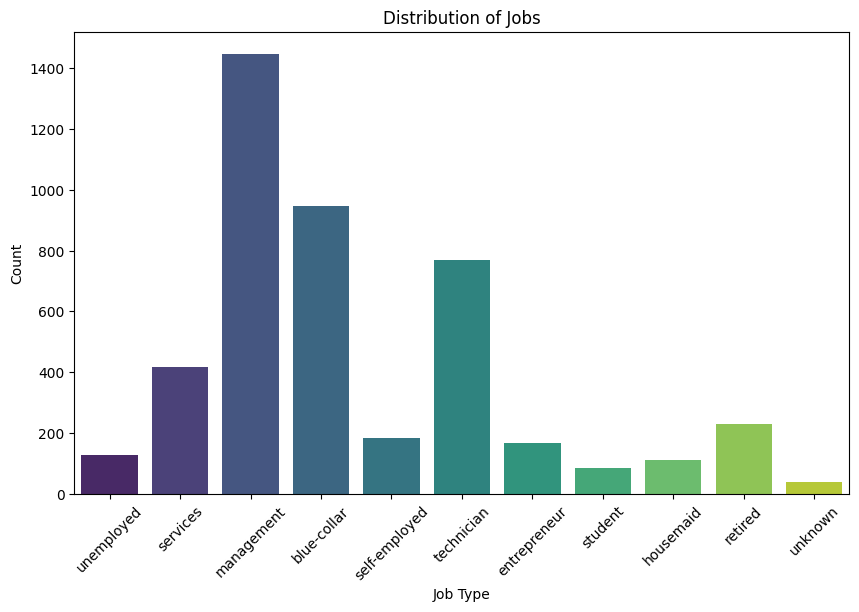

In [6]:
# Visualization 1: Distribution of Jobs
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', palette='viridis')
plt.title('Distribution of Jobs')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

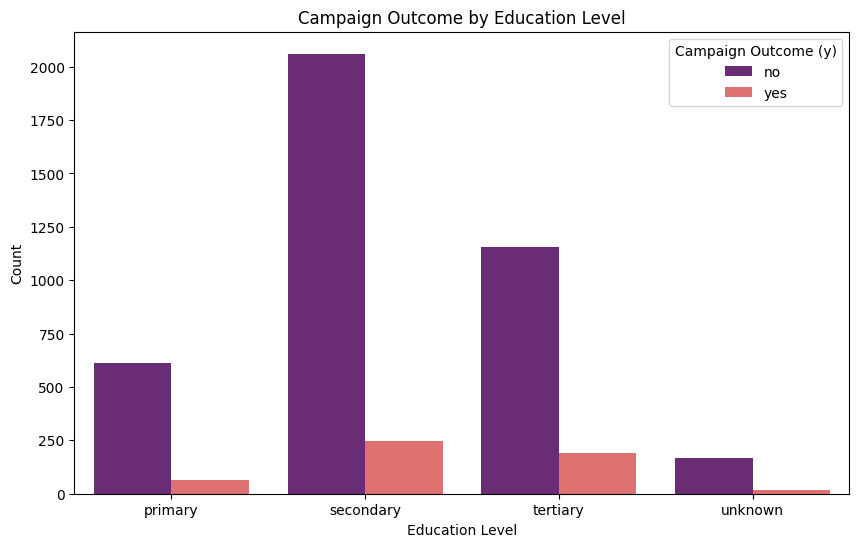

In [7]:
# Visualization 2: Campaign Outcome by Education Level
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='y', palette='magma')
plt.title('Campaign Outcome by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Campaign Outcome (y)')
plt.show()

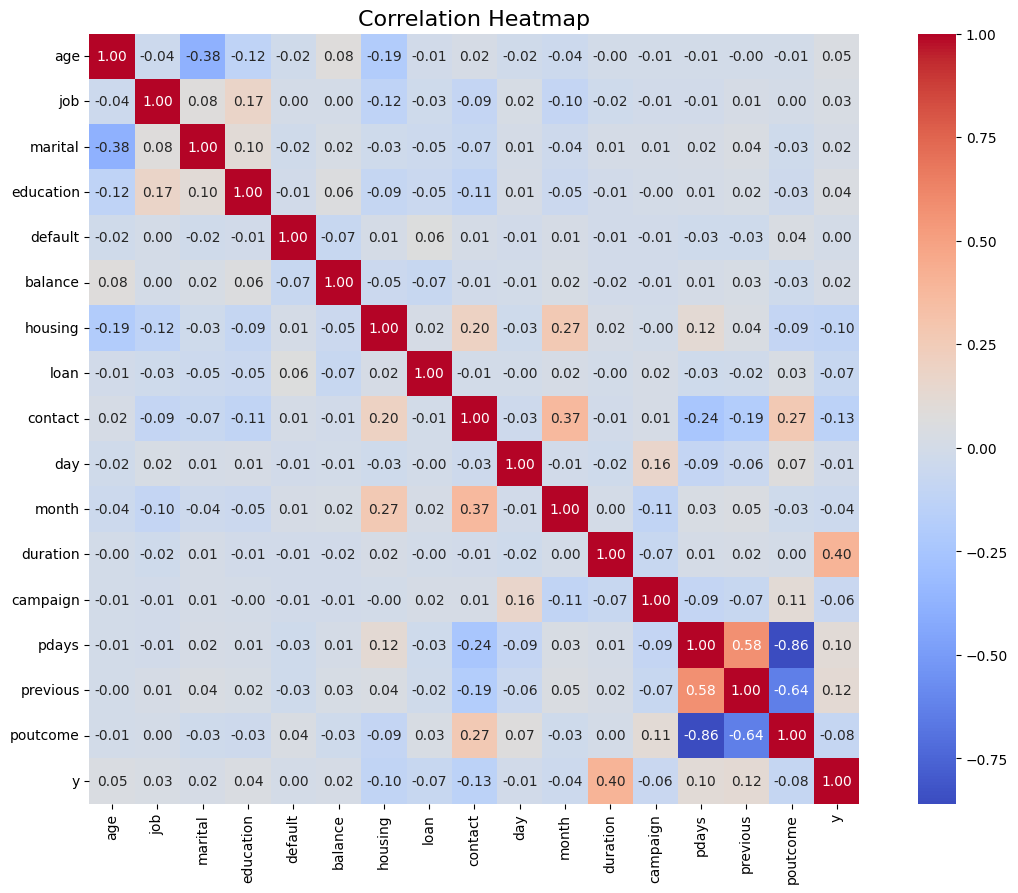

In [8]:
label_encoder = LabelEncoder() ## Changing categorical values to int
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column].astype(str))

# Visualization 3: Correlation Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Machine Learning (Split Data)

In [9]:
X = df.drop(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'poutcome', 'y'], axis = 1)
y = df['y']

smote_enn = SMOTEENN(random_state=0) ## Balancing the data using smoteen

X, y = smote_enn.fit_resample(X, y)

print("Class distribution after SMOTEEN:")
print(y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Class distribution after SMOTEEN:
y
0    3044
1    2275
Name: count, dtype: int64


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [15]:
## A] Defining the model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

## B] Predict the test set results
y_pred_rf = rf_classifier.predict(X_test)

## C] Check accuracy score
accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy: {accuracy}')

## D] Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix Random Forest:")
print(cm_rf)

## E] Classification report
class_report_rf = classification_report(y_test, y_pred_rf)
print("Classification Report Random Forest: \n", class_report_rf)

## F] Results and conclusion
print("Random Forest Correctly classified almost all instances with only 10 false positives and 0 false negatives, indicating excellent performance on both classes.")
print("Random Forest Scored near-perfect precision, recall, and F1-scores across both classes, with values close to 1.00.")

Accuracy: 0.9906015037593985

Confusion Matrix Random Forest:
[[611  10]
 [  0 443]]
Classification Report Random Forest: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       621
           1       0.98      1.00      0.99       443

    accuracy                           0.99      1064
   macro avg       0.99      0.99      0.99      1064
weighted avg       0.99      0.99      0.99      1064

Random Forest Correctly classified almost all instances with only 10 false positives and 0 false negatives, indicating excellent performance on both classes.
Random Forest Scored near-perfect precision, recall, and F1-scores across both classes, with values close to 1.00.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [17]:
## A] Defining the model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

## B] Predict the test set results
y_pred = gb_model.predict(X_test)

## C] Check accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

## D] Confusion matrix
cm_xg = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix XGBoost:")
print(cm_xg)

## E] Classification report
class_report_xg = classification_report(y_test, y_pred)
print("Classification Report Gradient Boosting: \n", class_report_xg)

## F] Results and conclusion
print("Gradient Boosting, Had 16 false positives and 7 false negatives, which slightly reduced its performance in comparison to Random Forest.")
print("Gradient Boosting, Showed high precision and recall for both classes, with an overall macro average F1-score of 0.98, slightly lower than Random Forest.")

Accuracy: 0.9783834586466166

Confusion Matrix XGBoost:
[[605  16]
 [  7 436]]
Classification Report Gradient Boosting: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       621
           1       0.96      0.98      0.97       443

    accuracy                           0.98      1064
   macro avg       0.98      0.98      0.98      1064
weighted avg       0.98      0.98      0.98      1064

Gradient Boosting, Had 16 false positives and 7 false negatives, which slightly reduced its performance in comparison to Random Forest.
Gradient Boosting, Showed high precision and recall for both classes, with an overall macro average F1-score of 0.98, slightly lower than Random Forest.


In [20]:
## Overall Conclusion

print("The Random Forest model outperforms the Gradient Boosting model in terms of accuracy, precision, recall, and F1-score. Both models perform well overall.")

The Random Forest model outperforms the Gradient Boosting model in terms of accuracy, precision, recall, and F1-score. Both models perform well overall.
